In [2]:
import argparse
import cv2
import os
from skimage.exposure import is_low_contrast
from PIL import Image
import skimage
from matplotlib import pyplot as plt
import numpy as np
from retinex import *

classes = ["car", "pickup_truck", "background"]

directory = 'collected_images/collected_images'

for class_name in classes:
    count = 0
    for entry in os.scandir(directory + "/" + class_name):
        if (entry.is_file()):
            old_name = entry.path
            new_name = entry.path.replace(' ', '_')
            os.rename(old_name, new_name)



In [2]:
# Shrinking
classes = ["car", "background"]

directory = 'collected_images/collected_images'

for class_name in classes:
    count = 0
    for entry in os.scandir(directory + "/" + class_name):
        if (entry.is_file()):
            path_pieces = entry.path.split("/")
            base_width = 224
            img = Image.open(entry.path)
            wpercent = (base_width / float(img.size[0]))
            hsize = int((float(img.size[1]) * float(wpercent)))
            img = img.resize((base_width, hsize), Image.Resampling.LANCZOS)
            new_name = path_pieces[0]
            new_name += "/collected_images_base/"
            new_name += class_name
            new_name += "/"
            new_name += path_pieces[3]
            img.save(new_name)
            img = cv2.imread(new_name)
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            new_name = path_pieces[0]
            new_name += "/collected_images_base_gray/"
            new_name += class_name
            new_name += "/"
            new_name += path_pieces[3]
            cv2.imwrite(new_name, img_gray)

In [3]:
# Darkening
classes = ["car", "background"]

clahe = cv2.createCLAHE(clipLimit=2)
directory = 'collected_images/collected_images_base_gray'

for class_name in classes:
    count = 0
    for entry in os.scandir(directory + "/" + class_name):
        if (entry.is_file()):
            path_pieces = entry.path.split("/")
            rgb_img = cv2.imread(entry.path)
            ycrcb_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2YCrCb)
            count = 0
            while not (is_low_contrast(ycrcb_img, fraction_threshold=0.08)):
                ycrcb_img[:,:,0] = np.power(ycrcb_img[:,:,0], 0.8)
                darkened_img = cv2.cvtColor(ycrcb_img, cv2.COLOR_YCrCb2BGR)
                count = count + 1
                if (count == 5):
                    break
            else:
                darkened_img = rgb_img
            #curr_img = cv2.cvtColor(darkened_img, cv2.COLOR_BGR2GRAY)
            curr_img = darkened_img
            new_name = path_pieces[0]
            new_name += "/collected_images_dark/"
            new_name += class_name
            new_name += "/"
            new_name += path_pieces[3]
            cv2.imwrite(new_name, curr_img)

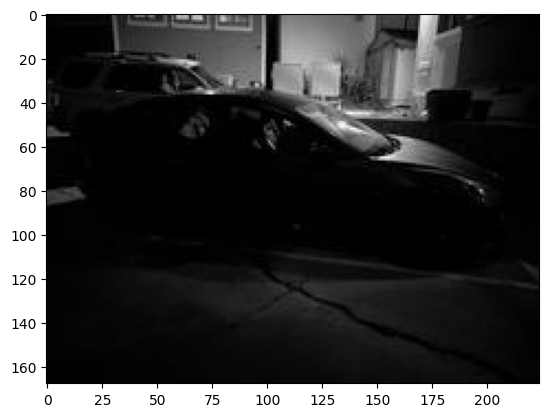

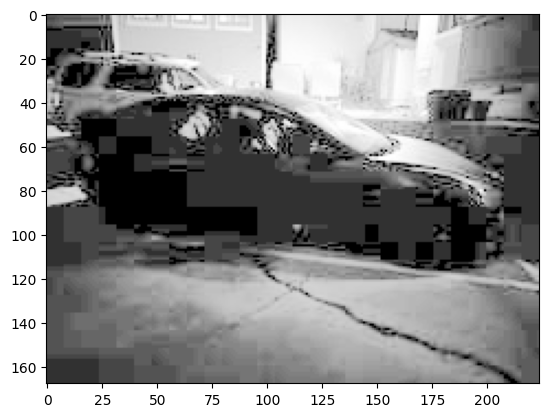

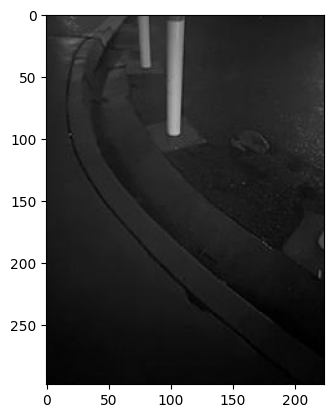

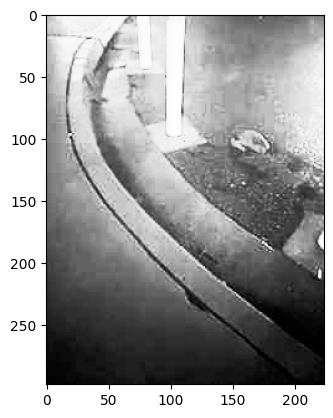

In [22]:
count = 0
classes = ["car", "background"]

clahe = cv2.createCLAHE(clipLimit=6)
directory = 'collected_images/collected_images_dark'

for class_name in classes:
    count = 0
    for entry in os.scandir(directory + "/" + class_name):
        if (entry.is_file()):
            path_pieces = entry.path.split("/")
            rgb_img = cv2.imread(entry.path)
            
            ycrcb_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2YCrCb)
            if (is_low_contrast(ycrcb_img, fraction_threshold=0.08)):
                very_low = False
                if (is_low_contrast(ycrcb_img, fraction_threshold=0.08)):
                    very_low = True
                ycrcb_img[:,:,0] = cv2.equalizeHist(ycrcb_img[:,:,0])
                #ycrcb_img[:,:,0] = np.clip(clahe.apply(ycrcb_img[:,:,0]) + 30, 0, 255).astype(np.uint8)
                equalized_img = cv2.cvtColor(ycrcb_img, cv2.COLOR_YCrCb2BGR)
                if (count == 1 and very_low):
                    plt.figure()
                    plt.imshow(rgb_img)
                    plt.show()
                    plt.figure()
                    plt.imshow(equalized_img)
                    plt.show()      
                count = count + 1
            else:
                equalized_img = rgb_img
            curr_img = equalized_img
            #curr_img = rgb_img
            #curr_img = cv2.cvtColor(equalized_img, cv2.COLOR_BGR2GRAY)
            new_name = path_pieces[0]
            new_name += "/collected_images_ahe/"
            new_name += class_name
            new_name += "/"
            new_name += path_pieces[3]
            cv2.imwrite(new_name, curr_img)

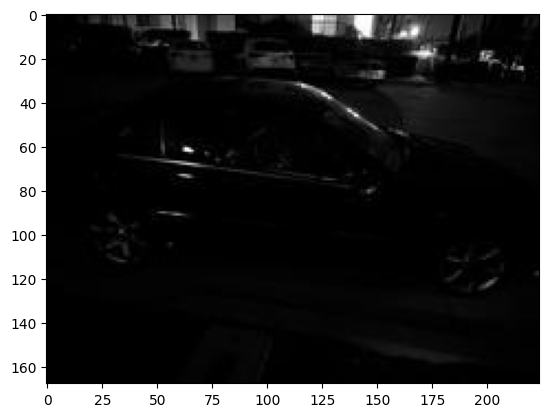

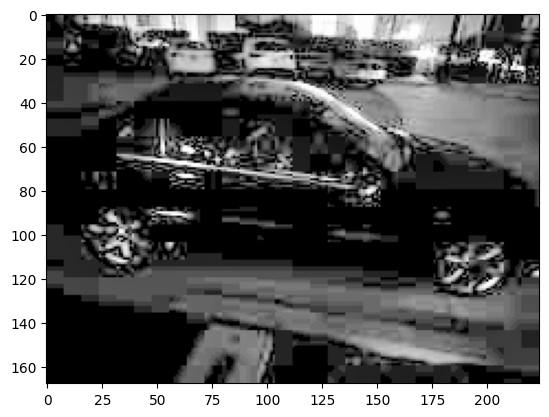

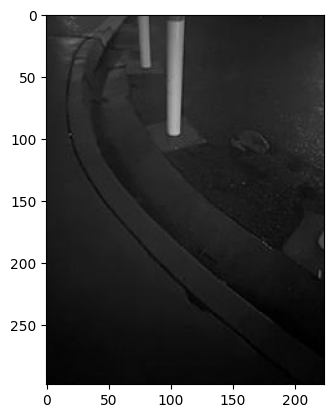

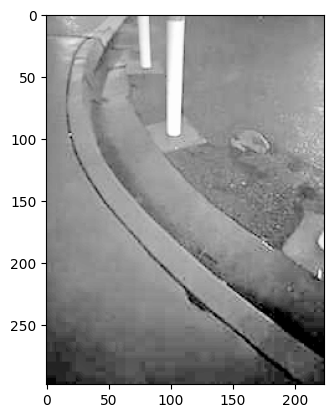

In [21]:
count = 0
classes = ["car", "background"]
directory = 'collected_images/collected_images_dark'

for class_name in classes:
    count = 0
    for entry in os.scandir(directory + "/" + class_name):
        if (entry.is_file()):
            path_pieces = entry.path.split("/")
            rgb_img = cv2.imread(entry.path)
            
            ycrcb_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2YCrCb)
            if (is_low_contrast(ycrcb_img, fraction_threshold=0.10)):
                reti_eq_img = msrcp(rgb_img, sigma_scales=[15, 80, 200])
                if (count == 1):
                    plt.figure()
                    plt.imshow(rgb_img)
                    plt.show()
                if (count == 1):
                    plt.figure()
                    plt.imshow(reti_eq_img)
                    plt.show()      
                count = count + 1
            else:
                reti_eq_img = rgb_img
            curr_img = reti_eq_img
            #curr_img = cv2.cvtColor(reti_eq_img, cv2.COLOR_YCrCb2BGR)
            new_name = path_pieces[0]
            new_name += "/collected_images_reti/"
            new_name += class_name
            new_name += "/"
            new_name += path_pieces[3]
            cv2.imwrite(new_name, curr_img)

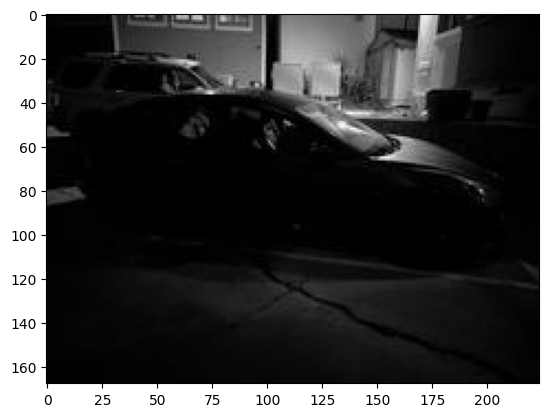

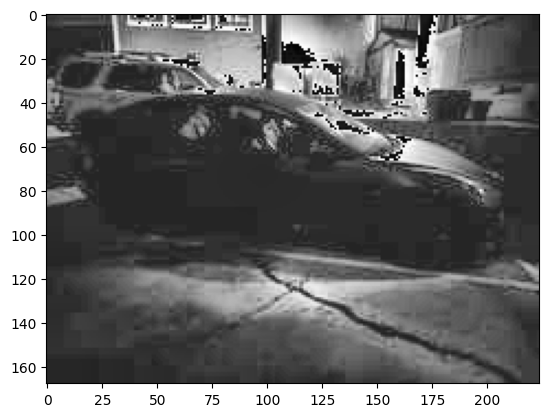

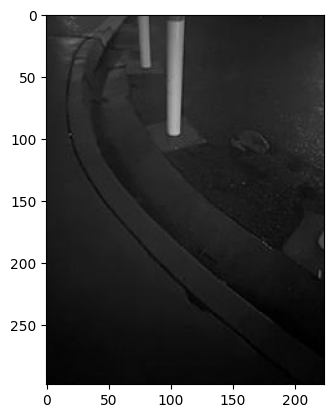

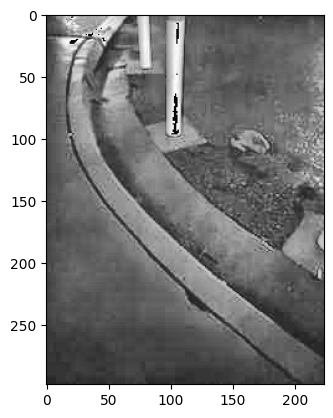

In [23]:
count = 0
classes = ["car", "background"]

clahe = cv2.createCLAHE(clipLimit=6)
directory = 'collected_images/collected_images_dark'

for class_name in classes:
    count = 0
    for entry in os.scandir(directory + "/" + class_name):
        if (entry.is_file()):
            path_pieces = entry.path.split("/")
            rgb_img = cv2.imread(entry.path)
            
            ycrcb_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2YCrCb)
            if (is_low_contrast(ycrcb_img, fraction_threshold=0.08)):
                very_low = False
                if (is_low_contrast(ycrcb_img, fraction_threshold=0.08)):
                    very_low = True
                #ycrcb_img[:,:,0] = cv2.equalizeHist(ycrcb_img[:,:,0])
                ycrcb_img[:,:,0] = np.clip(clahe.apply(ycrcb_img[:,:,0]) + 30, 0, 255).astype(np.uint8)
                equalized_img = cv2.cvtColor(ycrcb_img, cv2.COLOR_YCrCb2BGR)
                if (count == 1 and very_low):
                    plt.figure()
                    plt.imshow(rgb_img)
                    plt.show()
                    plt.figure()
                    plt.imshow(equalized_img)
                    plt.show()      
                count = count + 1
            else:
                equalized_img = rgb_img
            curr_img = equalized_img
            #curr_img = rgb_img
            #curr_img = cv2.cvtColor(equalized_img, cv2.COLOR_BGR2GRAY)
            new_name = path_pieces[0]
            new_name += "/collected_images_clahe/"
            new_name += class_name
            new_name += "/"
            new_name += path_pieces[3]
            cv2.imwrite(new_name, curr_img)